<a href="https://colab.research.google.com/github/JeandsGomes/Estudando_Ciencia_de_Dados_com_Python/blob/main/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

notas = pd.read_csv("/content/drive/MyDrive/1.Projetos GitHub/Data Science/ratings.csv")

In [4]:
# Mostar os 5 primeiros elementos
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# Informar as dimenções das tabelas
notas.shape

(100836, 4)

In [6]:
# Redefinir os nomes das colunas
notas.columns = ["usuarioId","filmeId","nota","momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analizando as notas em geral

In [7]:
# Observar todos os valores da coluna nota
notas['nota'] # Uma serie

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [8]:
# Quais são os valores unicos dessa dessa tabela
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
# Frequencia das notas na tabela
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [10]:
# Media de todas as notas e mediana
print('Media:',notas['nota'].mean())
print('Mediana:',notas.nota.median())

Media: 3.501556983616962
Mediana: 3.5


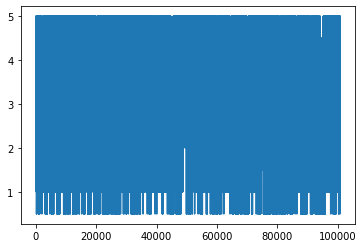

In [11]:
# Como plotar uma coluna com pandas
notas.nota.plot()
# Por padrão ele var um plote de linhas com dimenções index X valor

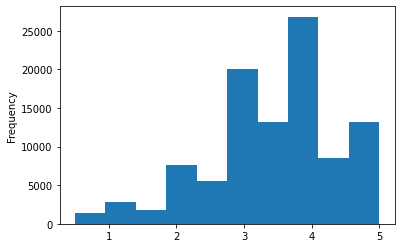

In [12]:
# Como plotar em forma de histograma com pandas
notas.nota.plot(kind='hist')

In [13]:
# Visalizar varias informação
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


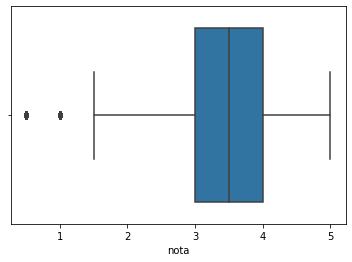

In [14]:
# Plotagemd o tipo blox plot
import seaborn as sns
sns.boxplot(notas.nota) 

Cada caixa representar 25% ou seja as duas compõem 50 porcendo, a linha cenmtral representa a mediana. as linhas apos as caixas tambem correspondem a 25% cada.
* O que podemos concluir a respieto disso ??

  * Mertade das pessoas (50%) esta dando notas entre 3 e 4.
  * menos de 25% das pessoas deram notas entre 1.5 e 3.
  * 25% das pessaos deram notas entre 4 e 5.



## Exploratory data analysis

## Olhando os filmes

In [15]:
filmes = pd.read_csv('/content/drive/MyDrive/1.Projetos GitHub/Data Science/movies.csv')

In [16]:
filmes.columns = ['filmeId','titulo','generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analizando alguimas notas especificas

### Toy Story

In [18]:
# Quealizar uma query
notas.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [19]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

### Jumanjy

In [20]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

### Agrupar as notas por meio dos filmes

In [21]:
notas.groupby("filmeId")

### Obtear as medias de notas de cada filme

In [22]:
medias_por_filmes = notas.groupby("filmeId").nota.mean()
medias_por_filmes

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [23]:
medias_por_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

### Plotando o histograma media dos filmes

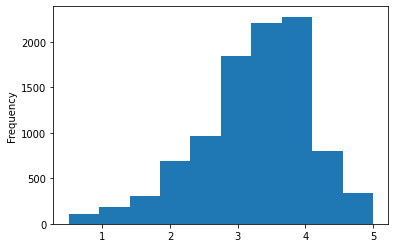

In [24]:
medias_por_filmes.plot(kind="hist")

### Ponto usando boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


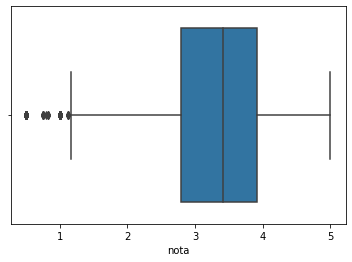

In [25]:
sns.boxplot(medias_por_filmes)

In [26]:
medias_por_filmes.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

* Quais são as conclusoes que obtivemos ??
  * A mediana das notas de 3.41
  * 25% das notas estar entre 3.4 e 2.8
  * 25% apos os 75% as notas stão entre 3.9 e 5.0



### Distribuição dos valores das notas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


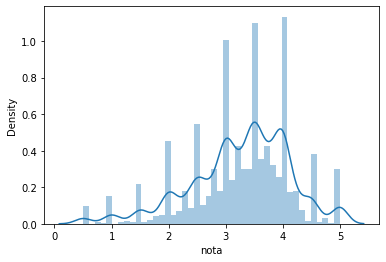

In [27]:
sns.distplot(medias_por_filmes)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


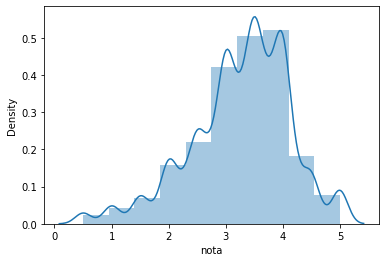

In [28]:
# Modificando as distribuições do distplot
sns.distplot(medias_por_filmes, bins=10)
# OBS.: CUidado com a quantidade de distribuição que você vai 
# usar, pois é possivel passar a informação errada a respeito
# dos dados mostrados.

Text(0.5, 1.0, 'Histograma das medias dos filmes')

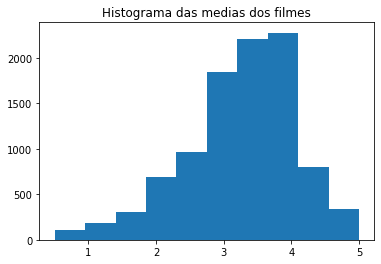

In [29]:
# Biblioteca que o pandas e o seaborn para plotar
import matplotlib.pyplot as plt

plt.hist(medias_por_filmes)
plt.title("Histograma das medias dos filmes")

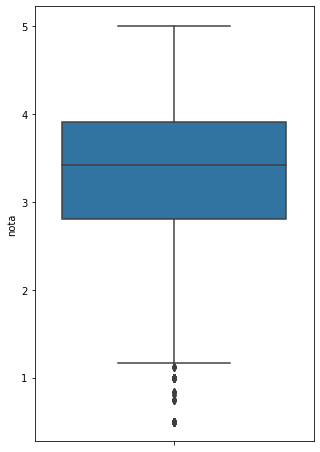

In [30]:
# Uma ontra forma de plotar com o sns.boxplot
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filmes)

## Analise da base de dados TMDB 5000

In [31]:
import pandas as pd 
tmdb = pd.read_csv('/content/drive/MyDrive/1.Projetos GitHub/Data Science/tmdb_5000/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [32]:
# Variavel do tipo categorica nominal é a que possui varias categorias e 
# nem um valor quantitativo.
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [33]:
# Variavel do tipo categorica ordinal onde possui varias 
# categorias hieraquicamente separadas.
# primeiro > segundo > terceiro

In [34]:
# Variavel do tipo qunatitativo não intervalar e continuo.
tmdb.budget.unique()

array([237000000, 300000000, 245000000, 250000000, 260000000, 258000000,
       280000000, 270000000, 200000000, 255000000, 225000000, 220000000,
       380000000, 215000000, 180000000, 207000000, 209000000, 150000000,
       210000000, 170000000, 190000000, 195000000, 105000000, 185000000,
       175000000, 140000000, 176000003, 178000000, 145000000,  27000000,
       165000000, 160000000,  15000000,  38000000, 155000000, 149000000,
       144000000,  70000000, 100000000, 139000000, 135000000, 130000000,
       137000000, 120000000, 132000000, 110000000, 125000000, 127500000,
       127000000, 103000000,  65000000, 123000000, 115000000, 117000000,
       113000000,  97250400, 116000000, 112000000,  93000000, 107000000,
               0, 133000000, 108000000, 126000000,  90000000, 102000000,
        80000000,  84000000,  99000000,  10000000,  98000000,  94000000,
        85000000,  92000000,  95000000,  79000000,  75000000,  88000000,
        68000000,  20000000,  87000000,  60000000, 

In [35]:
# Variavel do tipo qunatitativo supostamente intervalar não 
# continuo.
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [36]:
# Ocorrencia das linguagens
tmdb['original_language'].value_counts() # É apenas uma Serie

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
cs       2
ta       2
id       2
ro       2
ar       2
ps       1
af       1
xx       1
is       1
ky       1
el       1
nb       1
pl       1
no       1
sl       1
hu       1
vi       1
tr       1
te       1
Name: original_language, dtype: int64

In [37]:
# Transformando uma serie em um frame com index
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language','total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


## Visualização de catecogira

[Categorical Plots](https://seaborn.pydata.org/tutorial/categorical.html)

In [38]:
import seaborn as sns

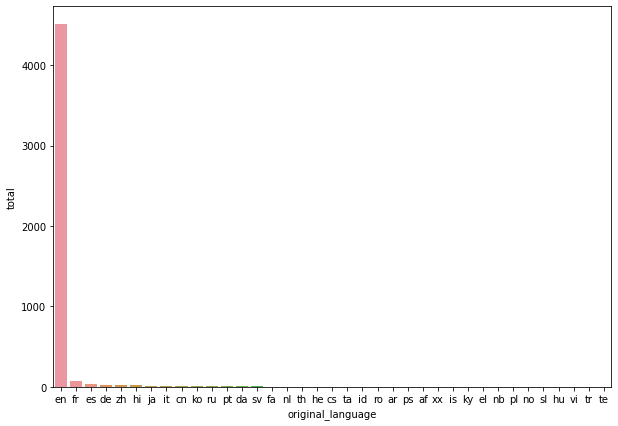

In [39]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'original_language', y = 'total',data = contagem_de_lingua)

In [40]:
# Atualizando para usar a verção mais atual se nescesario atual
print(sns.__version__)
#pip install <nome da biblioteca>==<verção que deseja>
# Resete o notebook

0.11.2


In [41]:
import matplotlib.pyplot as plt 

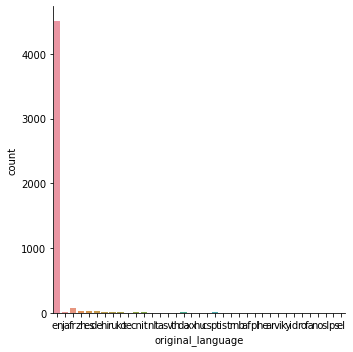

In [42]:
# Plotar os dados usando a base original
#legend_outbool
sns.catplot(x = 'original_language', kind='count',data=tmdb, legend_out= True)

([<matplotlib.patches.Wedge at 0x7f9095e68d90>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

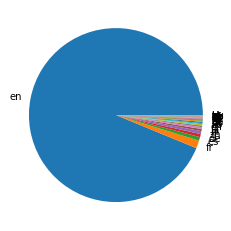

In [43]:
plt.pie(contagem_de_lingua['total'], labels=contagem_de_lingua['original_language'])

Como a categoria 'en' é muito grante não é possivel visalizar da aplitude dessa categoria em relação das outras classes (OBS.: o grafico de pizza é so ruim mesmo). Então por essa razão nos vamos apenas compra a categoria "en" em relação ao restante da linguas.

In [44]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print('en =',total_de_ingles)
print('resto =',total_do_resto)

en = 4505
resto = 298


In [45]:
# Criar um data frame
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles,total_do_resto]
}
dados = pd.DataFrame(dados)

In [46]:
dados

,lingua,total
0,ingles,4505
1,outros,298


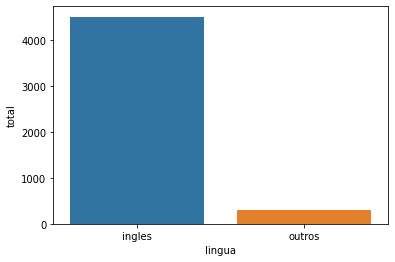

In [47]:
sns.barplot(x='lingua',y='total',data = dados)

([<matplotlib.patches.Wedge at 0x7f908ab4a250>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

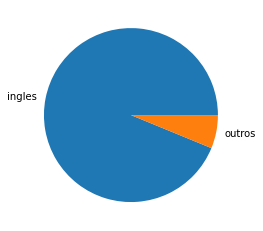

In [48]:
plt.pie(dados['total'],labels=dados['lingua'])

In [49]:
# Realizar a contagemd as outras lunguas
total_por_lingua_de_outros_filmes = tmdb.query('original_language != "en"')['original_language'].value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ta     2
cs     2
id     2
ro     2
ar     2
pl     1
hu     1
af     1
ky     1
xx     1
vi     1
ps     1
nb     1
no     1
tr     1
is     1
sl     1
te     1
el     1
Name: original_language, dtype: int64

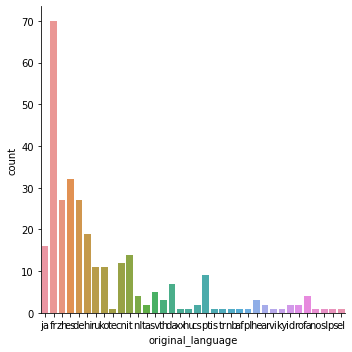

In [50]:
total_por_lingua_nao_en = tmdb.query('original_language != "en"')
sns.catplot(x = 'original_language',kind='count',data=total_por_lingua_nao_en)

### Exercico do modulo 04

In [51]:
tmdb["original_language"].value_counts().index
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [52]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.head()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


In [53]:
contagem_de_lingua.columns = ['original_language','total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


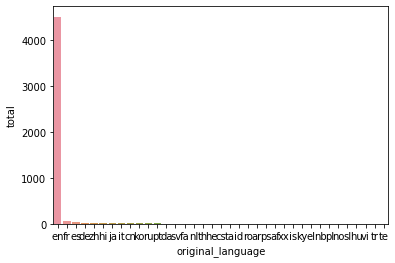

In [54]:
sns.barplot(x = 'original_language',y = 'total', data=contagem_de_lingua)

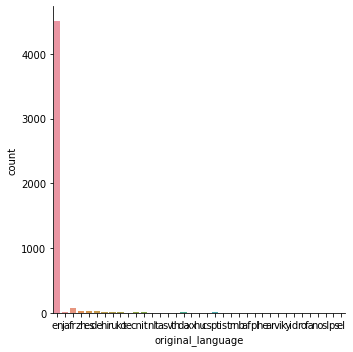

In [55]:
sns.catplot(x = 'original_language', kind='count',data=tmdb)

([<matplotlib.patches.Wedge at 0x7f908a76ac10>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

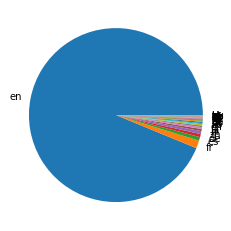

In [56]:
plt.pie(contagem_de_lingua['total'],labels=contagem_de_lingua['original_language'])

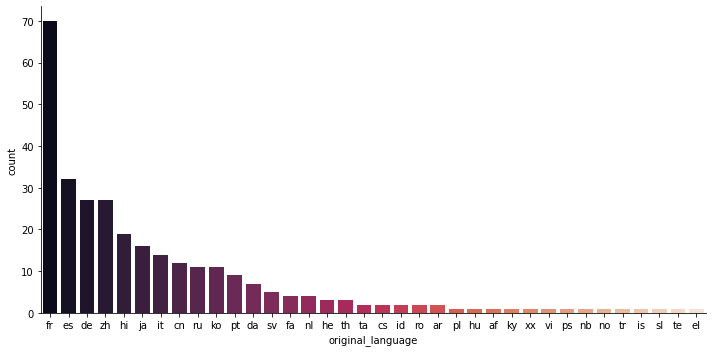

In [57]:
total_por_lingua_nao_en = tmdb.query('original_language != "en"')
# Para melhorarmos a visualização dos dasdpos de linguagens menos 
# o englis usaremos a seguinte função com o seguintes parametros.
sns.catplot(x = 'original_language',kind='count',
            data=total_por_lingua_nao_en,
            aspect = 2,
            palette = "rocket",
            order = total_por_lingua_de_outros_filmes.index)

### Exercicios do modulo 5

In [58]:
'''
Começaremos contando os valores das categorias (línguas) que 
existem no nosso CSV. Em seguida, somaremos esses valores, 
alocando-os a uma variável total_geral. 
'''
total_geral = tmdb['original_language'].value_counts()
total_do_geral = total_geral.sum()

In [59]:
'''
Dessa variável, iremos subtrair somente os filmes cuja língua é 
inglês (en), resultando no nosso total_do_resto:
'''
total_resto = tmdb.query('original_language != "en"')['original_language'].value_counts()
total_do_resto = total_resto.sum()

In [60]:
total_de_ingles = total_do_geral - total_do_resto

In [61]:
'''
Prosseguindo, criaremos um dicionário do Pandas contendo duas 
colunas: "língua", dividida entre ingles e outros; e "total", 
com os valores de total_de_ingles e total_do_resto. Com esse 
dicionário, geraremos um dataframe:
'''
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)

In [62]:
dados.head()

,lingua,total
0,ingles,4505
1,outros,298


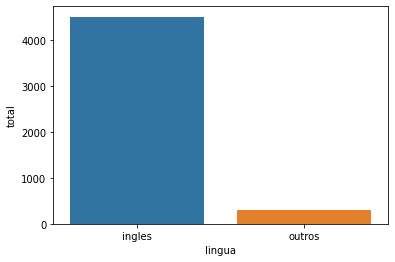

In [63]:
sns.barplot(x="lingua", y="total", data = dados)

In [64]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()

In [65]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

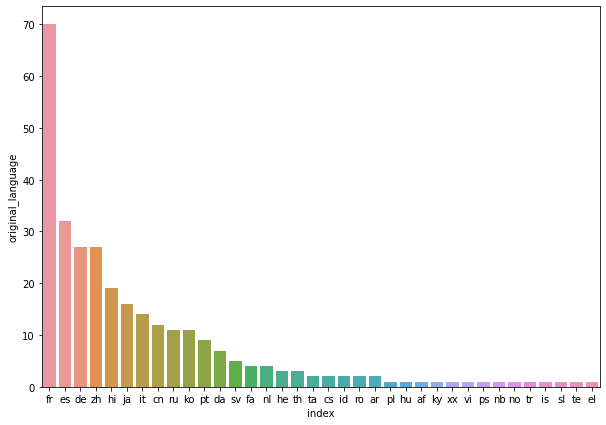

In [66]:
data = total_resto.to_frame().reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x ='index', 
            y = 'original_language',
            data = data)

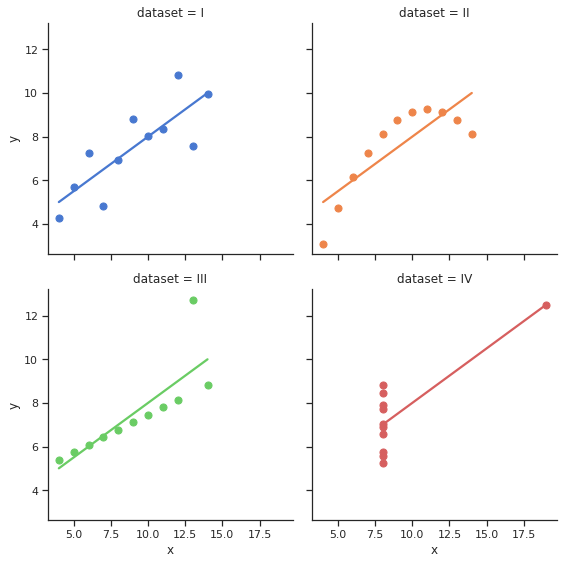

In [67]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

## Média, mediana, desvio padrão, boxplot, histograma, tendência central e dispersão, como tudo isso se encaixa

In [75]:
# Vamos dar uma olhada nos dois primeiros elementos
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [81]:
notas_do_toy_story = notas.query('filmeId == 1')
notas_do_jumanji = notas.query('filmeId == 2')
print('Qnt de NOTAS do Toy Story =',len(notas_do_toy_story))
print('Qnt de NOTAS de Jumanji =',len(notas_do_jumanji))

Qnt de NOTAS do Toy Story = 215
Qnt de NOTAS de Jumanji = 110


,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [89]:
print("MEDIA da nota do Toy Story: %.2f"%(notas_do_toy_story['nota'].mean()))

MEDIA da nota do Toy Story: 3.92


In [90]:
print("MEDIANA da nota do Toy Story: %.2f"%(notas_do_toy_story['nota'].median()))

MEDIANA da nota do Toy Story: 4.00


In [91]:
print("MEDIA da nota do Toy Story: %.2f"%(notas_do_jumanji['nota'].mean()))

MEDIA da nota do Toy Story: 3.43


In [92]:
print("MEDIANA da nota do Toy Story: %.2f"%(notas_do_jumanji['nota'].median()))

MEDIANA da nota do Toy Story: 3.50


Mesmo tendo a media e a mediana, não podemos concluir nada sobre o comportamento individuoal de cada usuario. Pois tanto a media e a mediana olhão para o centro, resumindo todos os valores, perdendo a distribuição das notas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


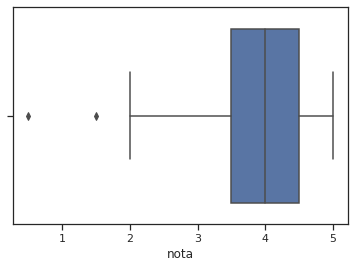

In [100]:
sns.boxplot(notas_do_toy_story.nota)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


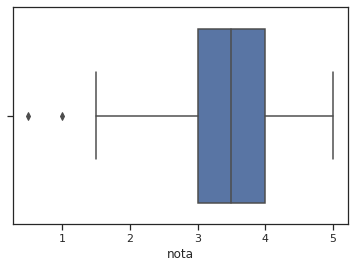

In [98]:
sns.boxplot(notas_do_jumanji.nota)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7f90848ddd10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f90848e6210>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f90848b6bd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f90848e6690>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f90848eacd0>,
  <matplotlib.lines.Line2D at 0x7f908488d650>]}

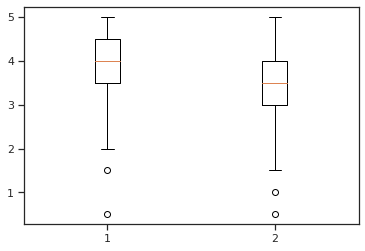

In [102]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

É possivel observar que no toy story temos uma distrivuição mais para cima em relação o jumanji.

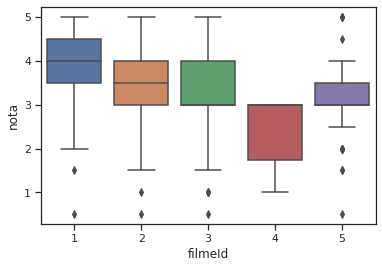

In [107]:
# Outra maneira de plotar esse resultado
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2,3,4,5]"))

### Desvio padrão

In [112]:
print('DESVIO PADRÃO do TOY STORY:',notas_do_toy_story.nota.std())
print('DESVIO PADRÃO do JUMANJI:',notas_do_jumanji.nota.std())

DESVIO PADRÃO do TOY STORY: 0.8348591407114045
DESVIO PADRÃO do JUMANJI: 0.8817134921476455


## Exercicio do modulo 06

Dado esse exemplo, como podemos fazer um boxplot com as notas do Toy Story e as notas do Jumanji, utilizando o Seaborn e o Matplotlib?

In [115]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


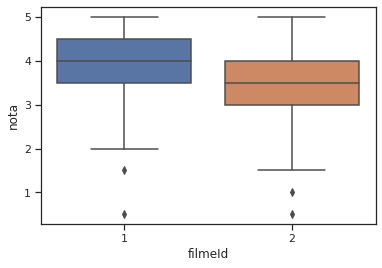

In [118]:
# Seaborn
sns.boxplot(x = 'filmeId', y = 'nota', data = notas.query('filmeId in [1,2]'))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7f90846bda10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9084724d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f90846ce0d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f90846e93d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f90846eb910>,
  <matplotlib.lines.Line2D at 0x7f90846837d0>]}

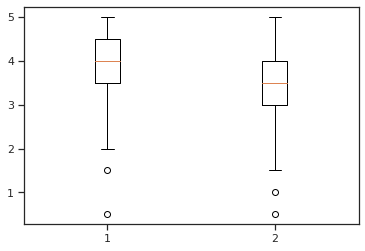

In [114]:
# matplotlib
plt.boxplot([notas_do_toy_story.nota,notas_do_jumanji.nota])